# Wine Reviews Analysis

## Note of wine against price, country, variety...

In [21]:
!pip3 install matplotlib
!pip3 install seaborn

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Infos

In [23]:
dataset = pd.read_csv("winemag-data-130k-v2.csv")

In [24]:
dataset.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [25]:
dataset.describe(include="all")

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129971.000000,129908,129971,92506,129971.000000,120975.000000,129908,108724,50511,103727,98758,129971,129970,129971
unique,NaN,43,119955,37979,NaN,NaN,425,1229,17,19,15,118840,707,16757
top,NaN,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,NaN,54504,3,2009,NaN,NaN,36247,4480,11065,25514,25514,11,13272,222
mean,64985.000000,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,37519.540256,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32492.500000,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,64985.000000,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,97477.500000,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
dataset = dataset.drop_duplicates()
print(dataset.describe(include="all"))

           Unnamed: 0 country  \
count   129971.000000  129908   
unique            NaN      43   
top               NaN      US   
freq              NaN   54504   
mean     64985.000000     NaN   
std      37519.540256     NaN   
min          0.000000     NaN   
25%      32492.500000     NaN   
50%      64985.000000     NaN   
75%      97477.500000     NaN   
max     129970.000000     NaN   

                                              description designation  \
count                                              129971       92506   
unique                                             119955       37979   
top     Seductively tart in lemon pith, cranberry and ...     Reserve   
freq                                                    3        2009   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                

0.4161667418606222
0.009950413387261646
-0.01290969162199544
0.016944379549410034
0.07262396839355607
-0.03368334763048752


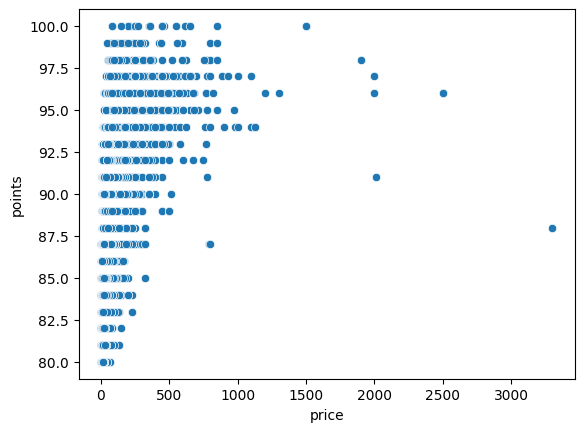

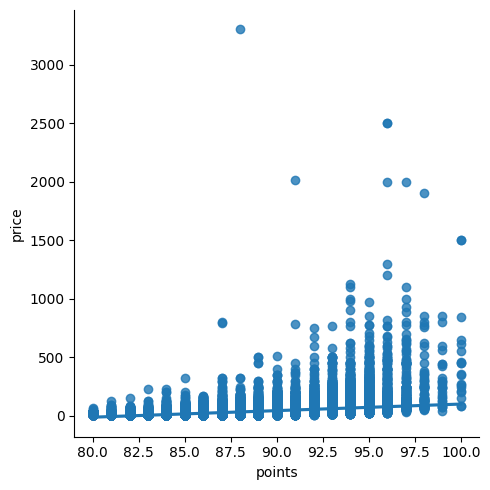

In [37]:
print(dataset["points"].corr(dataset["price"]))

dataset["country"]=dataset["country"].astype("category").cat.codes
dataset["province"]=dataset["province"].astype("category").cat.codes
dataset["region_1"]=dataset["region_1"].astype("category").cat.codes
dataset["region_2"]=dataset["region_2"].astype("category").cat.codes
dataset["description"]=dataset["description"].astype("category").cat.codes
dataset["designation"]=dataset["designation"].astype("category").cat.codes
dataset["variety"]=dataset["variety"].astype("category").cat.codes
dataset["taster_name"]=dataset["taster_name"].astype("category").cat.codes
dataset["taster_twitter_handle"]=dataset["taster_twitter_handle"].astype("category").cat.codes
dataset["title"]=dataset["title"].astype("category").cat.codes
dataset["winery"]=dataset["winery"].astype("category").cat.codes
dataset["variety"]=dataset["variety"].astype("category").cat.codes


print(dataset["points"].corr(dataset["country"]))
print(dataset["points"].corr(dataset["province"]))
print(dataset["points"].corr(dataset["region_1"]))
print(dataset["points"].corr(dataset["region_2"]))
print(dataset["points"].corr(dataset["variety"]))

sns.scatterplot(y="points", x="price", data=dataset)
sns.lmplot(y="price", x="points", data=dataset)

In [38]:
cormat = dataset.corr()
round(cormat,2)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
Unnamed: 0,1.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
country,0.01,1.00,0.01,-0.02,0.01,0.02,-0.13,0.31,0.56,-0.07,-0.17,0.07,0.10,0.07
description,0.00,0.01,1.00,0.00,-0.01,0.01,0.01,-0.01,0.02,0.01,-0.01,0.01,-0.01,0.01
designation,0.00,-0.02,0.00,1.00,0.09,0.05,0.05,-0.03,-0.00,-0.01,0.01,0.04,0.10,0.04
points,0.01,0.01,-0.01,0.09,1.00,0.42,-0.01,0.02,0.07,0.08,-0.00,-0.01,-0.03,-0.01
price,0.00,0.02,0.01,0.05,0.42,1.00,-0.05,0.04,0.05,0.02,-0.02,-0.01,-0.07,-0.01
province,0.00,-0.13,0.01,0.05,-0.01,-0.05,1.00,0.00,-0.14,-0.00,-0.02,0.04,0.14,0.04
region_1,0.00,0.31,-0.01,-0.03,0.02,0.04,0.00,1.00,0.34,-0.01,-0.05,0.00,0.00,0.00
region_2,0.00,0.56,0.02,-0.00,0.07,0.05,-0.14,0.34,1.00,0.03,-0.10,0.07,0.01,0.07
taster_name,0.00,-0.07,0.01,-0.01,0.08,0.02,-0.00,-0.01,0.03,1.00,0.90,-0.08,-0.08,-0.08


<Axes: >

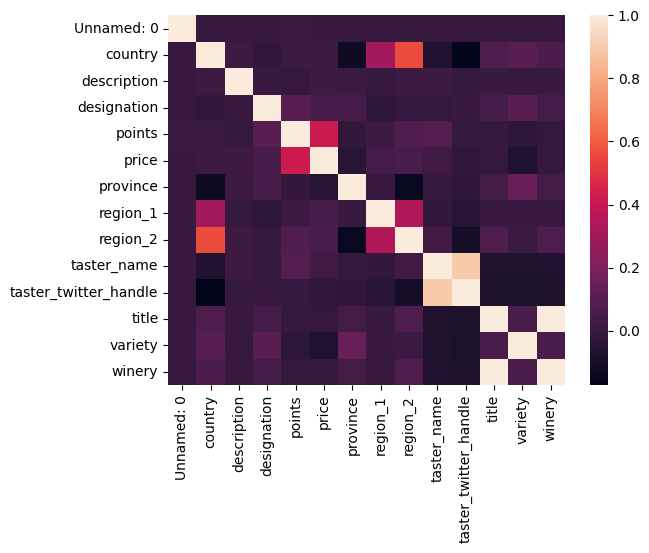

In [42]:
sns.heatmap(cormat)

## Analyses
We can see price and points have a correct correlation: 0.42, but very little with countries, regions or variety. 